# notebook to aggregate good channels for every session. index is the tetrode file name, 1st column is if at least 1 channel is good and the other columns indicate if the channel was good or not. this is then a dictionary index by session.

In [2]:
import sys
import json
import pickle
import pandas as pd
from pathlib import Path
from datetime import datetime 
import seaborn as sns
pd.set_option('display.max_rows', None)


In [4]:
# task table folder
subject = 'Li'
#data_root = '/home/alexgonzalez/Documents/TreeMazeAnalyses2/Pre_Processing/TasksDir/'
if subject in ['Li','Ne']:
    data_root = Path('/Data_SSD2T/Data/')
else:
    data_root = Path('/Data2_SSD2T/Data/')

pp_path = data_root / 'PreProcessed' / subject
save_path = data_root / 'Sorted' / subject

file_name = Path(pp_path,'TasksDir', 'pp_table_{}.json'.format(subject))
with file_name.open(mode="r") as f:
    task_table = json.load(f)

# get mapping for session and task id
session2task = {}
dates = {}
for k in task_table.keys():
    session = Path(task_table[k]['session_name']).name
    #if session.split('_')[0]==subject:
    if session.split('_')[0]==subject or session.split('_')[0]=='Ne':  
        session2task[session] = k
session_list = list(session2task.keys())

# sort sessions by date
session_dates = pd.DataFrame()
for session in session_list:
    session_dates.at[session,'date'] = datetime.strptime(session.split('_')[2],'%m%d%y')
sorted_sessions = list(session_dates.sort_values(by='date').index)

channel_table = pd.DataFrame(columns=range(1,17))

# obtain results for each session
for session_date in sorted_sessions:
    task_id = session2task[session_date]
    valid_session = task_table[task_id]['n_files']>=18 
    
    if valid_session:
        # processed data paths
        for subsession_id, subsession_path in task_table[task_id]['sp'].items():
            session_name = Path(subsession_path).name
            channel_table.loc[session_name] = -1
            for tt in range(1,17):
                tt_info_file = Path(subsession_path, 'tt_{}_info.pickle'.format(tt) )
                if tt_info_file.exists():
                    with tt_info_file.open(mode='rb') as f:
                        tt_info = pickle.load(f)
                    channel_table.at[session_name,tt]=(~tt_info['bad_chans']).sum()
channel_table = channel_table.apply(pd.to_numeric)
channel_table.to_csv(str(save_path)+'/chan_table_{}.csv'.format(subject) )

In [10]:
x = pd.read_csv(str(save_path)+'/chan_table_{}.csv'.format(subject),index_col=0)
list(x.index)

['Li_T3g_052818',
 'Li_OF_052818',
 'Li_T3g_052918',
 'Li_OF_052918',
 'Li_OF_053018',
 'Li_T3g_053018',
 'Li_OF_053118',
 'Li_T3g_053118',
 'Li_T3g_060118',
 'Li_OF_060118',
 'Li_T3g_060418',
 'Li_OF_060418',
 'Li_T3i_060518',
 'Li_OF_060518',
 'Li_T3i_060618',
 'Li_OF_060718',
 'Li_T3i_060818',
 'Li_OF_060818',
 'Li_OF_061118',
 'Li_T3i_061118',
 'Li_OF_061218',
 'Li_T3i_061218',
 'Li_T3i_061218_0001',
 'Li_OF_061318',
 'Li_T3g_061318',
 'Li_T3g_061418',
 'Li_OF_061418',
 'Li_OF_061518',
 'Li_T3g_061518',
 'Li_OF_061818',
 'Li_T3g_061818',
 'Li_OF_062018',
 'Li_T3g_062018',
 'Li_T3g_062518',
 'Li_OF_062518',
 'Li_T3g_062618',
 'Li_OF_062618',
 'Li_T3g_062718',
 'Li_OF_062718',
 'Li_T3g_062818',
 'Li_OF_062818',
 'Li_OF_062918',
 'Li_T3g_062918',
 'Li_OF_070218',
 'Li_T3g_070218',
 'Li_T3g_070518',
 'Li_T3g_070518_0001',
 'Li_T3g_070618',
 'Li_OF_070618',
 'Li_T3g_070918',
 'Li_OF_071018',
 'Li_T3g_071018',
 'Li_T3g_071118',
 'Li_T3g_072518',
 'Li_T3g_072618',
 'Li_T3g_073018',
 'Li_T

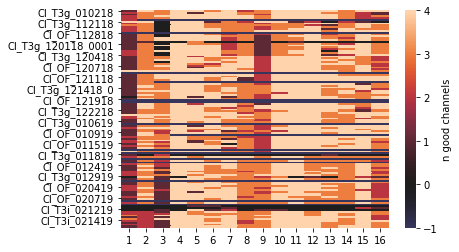

In [4]:
sns.heatmap(channel_table,center=0,cbar_kws={'label':'n good channels'})

In [5]:
channel_table.to_csv(str(data_root)+'/chan_table_{}.csv'.format(subject) )

In [48]:
print(session2task['Li_T3g_070518'],session2task['Li_T3g_070618'], session2task['Li_T3g_061418'],session2task['Li_T3g_061818'],session2task['Li_T3g_062018'], session2task['Li_T3g_052918'],)

50 51 40 42 43 34


{'1': {'session_name': 'Li_OF_052318',
  'session_folder': '/Data_SSD2T/Data/Raw/Li/Li_OF_052318',
  'Files': {'1': {'session': 'Li_OF_052318',
    'task_type': 'vt',
    'filenames': '/Data_SSD2T/Data/Raw/Li/Li_OF_052318/VT1.nvt',
    'sp': '/Data_SSD2T/Data/PreProcessed/Li/Li_OF_052318',
    'subSessionID': '0000'},
   '2': {'session': 'Li_OF_052318',
    'task_type': 'ev',
    'filenames': '/Data_SSD2T/Data/Raw/Li/Li_OF_052318/Events.nev',
    'sp': '/Data_SSD2T/Data/PreProcessed/Li/Li_OF_052318',
    'subSessionID': '0000'}},
  'n_files': 2,
  'sp': {'0000': '/Data_SSD2T/Data/PreProcessed/Li/Li_OF_052318'},
  'n_SubSessions': 2,
  'valid_SubSessions': []},
 '2': {'session_name': 'Li_OF_052418',
  'session_folder': '/Data_SSD2T/Data/Raw/Li/Li_OF_052418',
  'Files': {'1': {'session': 'Li_OF_052418',
    'task_type': 'vt',
    'filenames': '/Data_SSD2T/Data/Raw/Li/Li_OF_052418/VT1.nvt',
    'sp': '/Data_SSD2T/Data/PreProcessed/Li/Li_OF_052418',
    'subSessionID': '0000'},
   '2': {'s